# 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
base_path = './preprocessed data/'

train_err = pd.read_csv(base_path + 'new_train_err.csv', parse_dates=['time'])
train_quality = pd.read_csv(base_path + 'new_train_quality.csv', parse_dates=['time'])
train_problem = pd.read_csv(base_path + 'new_train_problem.csv', parse_dates=['time'])
test_err = pd.read_csv(base_path + 'new_test_err.csv', parse_dates=['time'])
test_quality = pd.read_csv(base_path + 'new_test_quality.csv', parse_dates=['time'])
submission = pd.read_csv("C:/Users/gmlkd/data/시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/sample_submission.csv")

# 데이터 분석

In [5]:
train_err.head()

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0


## 시간대별 분석

### train_err

In [6]:
# 일별 에러 발생

# 비교적 주말에 에러가 많이 발생했다.
train_err.time.dt.day.value_counts()

21    562283
22    556151
15    554778
1     553561
7     551177
8     541958
28    527480
29    525630
14    520291
19    518417
6     516747
2     513572
23    513511
24    509559
9     507302
18    506377
5     502597
20    501508
26    499517
12    497408
10    497012
3     496842
27    492887
16    492638
25    492618
4     489363
11    488927
30    484872
17    483993
13    469020
31         5
Name: time, dtype: int64

In [7]:
# 11월 1일로 들어가도 될 것같다.
train_err[train_err.time.dt.day == 31]

,user_id,time,model_nm,fwver,errtype,errcode
5892567,15801,2020-10-31 23:59:59,model_0,04.22.1750,16,1
8533535,18418,2020-10-31 23:59:59,model_0,04.22.1750,26,1
11304925,20974,2020-10-31 23:59:59,model_0,04.22.1750,26,1
12545032,22249,2020-10-31 23:59:59,model_0,04.22.1750,26,1
12698894,22385,2020-10-31 23:59:59,model_2,04.33.1185,26,1


<AxesSubplot:xlabel='time', ylabel='Count'>

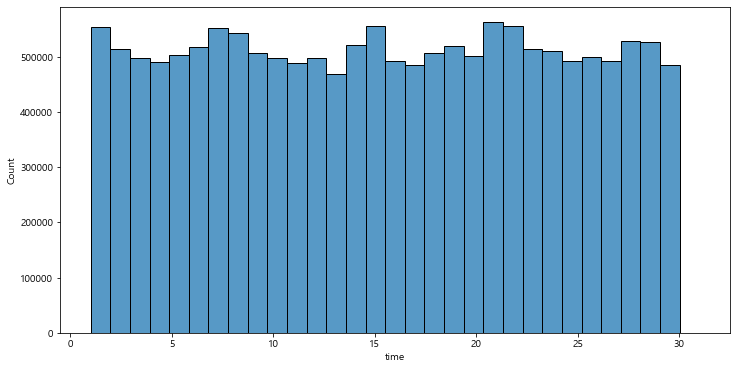

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_err, x=train_err.time.dt.day, bins=31)

In [9]:
# 시간대별 에러발생
train_err.time.dt.hour.value_counts()

19    824162
20    792258
21    791873
18    783808
22    729112
17    713929
8     677857
0     658982
2     648567
16    647170
3     645580
4     643244
9     637959
23    622782
7     618374
13    603780
15    600263
12    592900
10    592178
14    581045
11    575142
5     519059
6     444071
1     423906
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

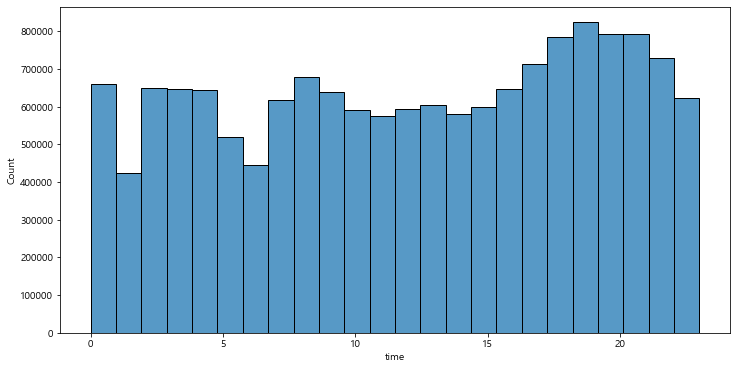

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_err, x=train_err.time.dt.hour, bins=24)

### train_problem 

In [11]:
# 요일별 불만 제기 수

train_problem.time.dt.day_of_week.value_counts()

0    1332
2     868
4     853
1     809
3     809
5     431
6     327
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

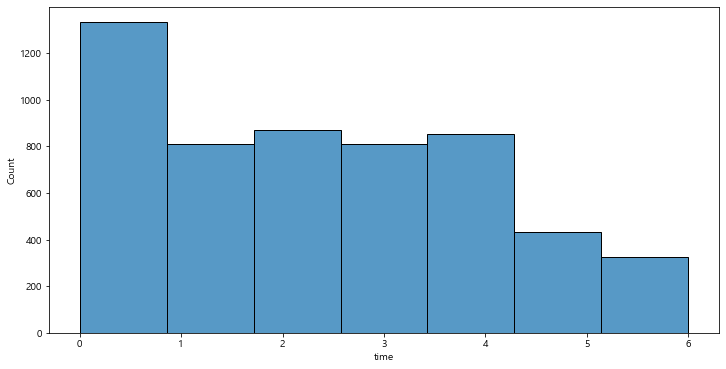

In [12]:
# 주말에 에러가 많이 발생하지만 불만 제기는 월요일이 가장 많다.
# 주말에는 고객센터가 문을 열지 않을 것이라 생각했을 수 있다.

plt.figure(figsize=(12,6))
sns.histplot(data=train_problem, x=train_problem.time.dt.day_of_week, bins=7)

In [13]:
# 시간대별 불만 제기 수
train_problem.time.dt.hour.value_counts()

12    627
11    600
13    518
19    507
18    492
15    489
16    460
17    432
22    233
20    233
14    228
21    204
23    175
0     108
1      67
2      15
10     14
9       8
5       5
8       5
3       4
4       3
7       1
6       1
Name: time, dtype: int64

<AxesSubplot:xlabel='time', ylabel='Count'>

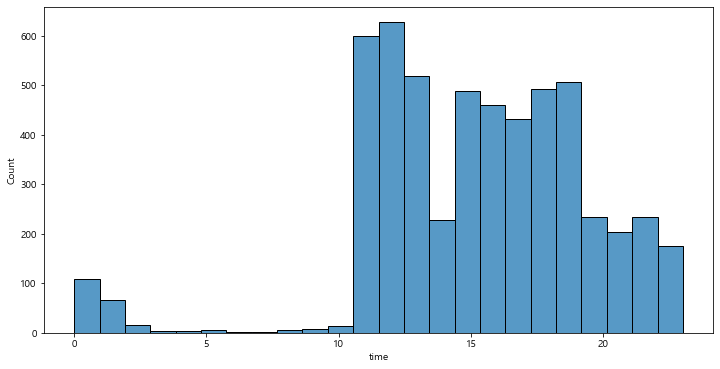

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data=train_problem, x=train_problem.time.dt.hour, bins=24)

- 에러가 발생한 요일, 시간대는 큰 차이가 나지 않는다.
- 하지만 불만을 제기한 요일과 시간대는 꽤 유의미한 차이가 난다.
- 따라서 에러가 발생한 요일, 시간은 trian set에 넣어도 될 것 같다.

## model_nm 분석

### model_nm에 따른 불만율

In [15]:
train_err.model_nm.unique()

array(['model_3', 'model_2', 'model_0', 'model_1', 'model_7', 'model_4',
       'model_5', 'model_8', 'model_6'], dtype=object)

In [16]:
problem_id_list = list(train_problem.user_id)

In [17]:
len(problem_id_list)

5429

In [18]:
id_model = train_err.groupby('model_nm')['user_id'].unique().to_frame()
id_model

,user_id
model_nm,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100..."
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100..."
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100..."
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100..."
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102..."
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119..."
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114..."
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111..."
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114..."


In [19]:
id_model['count'] = 0

In [20]:
id_model.iloc[0]

user_id    [10004, 10005, 10007, 10008, 10011, 10013, 100...
count                                                      0
Name: model_0, dtype: object

In [21]:
for i in range(len(id_model.index)):
    for j in problem_id_list:
        if j in id_model.iloc[i, 0]:
            id_model.iloc[i, 1] += 1

In [22]:
id_model

,user_id,count
model_nm,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25


In [23]:
count_sum = id_model['count'].values.sum()
count_sum

6149

In [24]:
id_model['problem_rate'] = id_model['count'] / count_sum * 100
id_model

,user_id,count,problem_rate
model_nm,,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769,28.768906
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426,23.190763
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918,31.192064
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789,12.831355
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153,2.488209
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23,0.374045
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10,0.162628
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36,0.585461
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25,0.406570


In [25]:
id_model['error_rate'] = train_err.model_nm.value_counts().sort_index() / train_err.model_nm.value_counts().sum() * 100

In [26]:
id_model

,user_id,count,problem_rate,error_rate
model_nm,,,,
model_0,"[10004, 10005, 10007, 10008, 10011, 10013, 100...",1769,28.768906,26.026404
model_1,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1426,23.190763,34.416356
model_2,"[10001, 10003, 10006, 10012, 10014, 10017, 100...",1918,31.192064,21.419331
model_3,"[10000, 10002, 10016, 10018, 10019, 10026, 100...",789,12.831355,11.987284
model_4,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",153,2.488209,5.512259
model_5,"[10110, 10408, 10411, 10600, 10719, 11058, 119...",23,0.374045,0.192302
model_6,"[10495, 10693, 11157, 11183, 11206, 11319, 114...",10,0.162628,0.011114
model_7,"[10075, 10244, 10556, 10694, 10744, 10922, 111...",36,0.585461,0.216300
model_8,"[10202, 10286, 10458, 10690, 11086, 11416, 114...",25,0.406570,0.218649


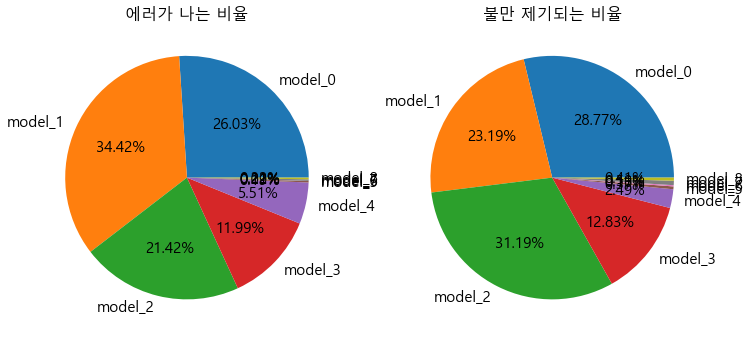

In [27]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.title('에러가 나는 비율', fontsize=16)
plt.pie(id_model['error_rate'], labels=id_model.index, autopct='%.2f%%', textprops={'fontsize':15})

plt.subplot(122)
plt.title('불만 제기되는 비율', fontsize=16)
plt.pie(id_model['problem_rate'], labels=id_model.index, autopct='%.2f%%', textprops={'fontsize':15})
plt.show()

- 에러는 model_1  > model_0 > model_2 순서로 많지만
- 해당 에러로 불만을 제기하는 사용자는 model_2 > model_0 > model_1 순서
- 모델에 따라 불만 제기 확률 편차가 크기 때문에 model_nm은 유의미한 column

### model_nm 변경

In [28]:
change_model =  train_err[['user_id', 'model_nm']]

In [29]:
change_model = change_model.drop_duplicates(subset=None, keep='first')

In [30]:
user_model_num = change_model.user_id.value_counts()
user_has_2models = list(user_model_num.loc[user_model_num > 1].to_frame().index)

In [31]:
user_sum = len(user_has_2models)
user_prob_sum = len(list(train_problem[train_problem['user_id'].isin(user_has_2models)].user_id.unique()))

print(f"모델이 변경되고 불만을 제기한 사람 {user_prob_sum/user_sum*100}% ")

모델이 변경되고 불만을 제기한 사람 91.4651493598862% 


- model_nm 변경이 불만 제기에 많은 영향을 미친다

### model_nm - fwver

In [32]:
model_fwver = train_err.groupby('model_nm')['fwver'].unique().to_frame().reset_index()
model_fwver

,model_nm,fwver
0,model_0,"[04.22.1750, 04.22.1778, 04.22.1684, 04.22.166..."
1,model_1,"[04.16.3553, 04.16.3571, 04.16.3439, 04.16.356..."
2,model_2,"[04.33.1185, 04.33.1261, 04.33.1149, 04.33.117..."
3,model_3,"[05.15.2138, 05.15.2120, 05.15.2090, 05.15.310..."
4,model_4,"[03.11.1149, 03.11.1167, 03.11.1141]"
5,model_5,"[04.82.1684, 04.82.1778, 04.82.1730]"
6,model_6,"[10, 8.5.3]"
7,model_7,"[05.66.3237, 05.66.3571]"
8,model_8,"[04.73.2237, 04.73.2571]"


In [63]:
model_fwver['fwver'][0]

array(['04.22.1750', '04.22.1778', '04.22.1684', '04.22.1666',
       '04.22.1442', '04.22.1656'], dtype=object)

In [64]:
# model_6를 제외하고 모델별로 4번째까지 같은 펌웨어 번호를 사용한다.

for nm in range(len(model_fwver.index)):
    print(f"{model_fwver.model_nm[nm]} -> \n {sorted(model_fwver['fwver'][nm])}")

model_0 -> 
 ['04.22.1442', '04.22.1656', '04.22.1666', '04.22.1684', '04.22.1750', '04.22.1778']
model_1 -> 
 ['04.16.2641', '04.16.3345', '04.16.3439', '04.16.3553', '04.16.3569', '04.16.3571']
model_2 -> 
 ['04.33.1095', '04.33.1125', '04.33.1149', '04.33.1171', '04.33.1185', '04.33.1261']
model_3 -> 
 ['05.15.2090', '05.15.2092', '05.15.2114', '05.15.2120', '05.15.2122', '05.15.2138', '05.15.3104']
model_4 -> 
 ['03.11.1141', '03.11.1149', '03.11.1167']
model_5 -> 
 ['04.82.1684', '04.82.1730', '04.82.1778']
model_6 -> 
 ['10', '8.5.3']
model_7 -> 
 ['05.66.3237', '05.66.3571']
model_8 -> 
 ['04.73.2237', '04.73.2571']


## fwver 분석

### fwver에 따른 불만율

In [34]:
fwver_df = train_err[['user_id', 'fwver']]

In [35]:
fwver_df = fwver_df.drop_duplicates(subset=None, keep='first')

In [36]:
user_fwver = fwver_df.groupby('fwver')['user_id'].unique().to_frame().reset_index()

In [37]:
user_fwver['count'] = 0

In [38]:
for i in range(37):
    user_fwver['count'][i] = len(list(train_problem[train_problem['user_id'].isin(user_fwver.user_id[i])].user_id.unique()))


In [39]:
user_fwver['rate'] = 0

In [40]:
for i in range(37):
        user_fwver['rate'][i] = round(user_fwver['count'][i]/len(user_fwver.user_id[i]) * 100, 2)

In [41]:
user_fwver

,fwver,user_id,count,rate
0,03.11.1141,"[13383, 14319]",1,50.00
1,03.11.1149,"[10080, 12659, 14956, 16535, 23098, 24175]",0,0.00
2,03.11.1167,"[10092, 10167, 10168, 10171, 10206, 10207, 102...",141,20.64
3,04.16.2641,[21965],1,100.00
4,04.16.3345,"[23726, 23860]",1,50.00
5,04.16.3439,"[14840, 15345, 15950, 16920, 20813, 21638]",2,33.33
6,04.16.3553,"[10006, 10009, 10010, 10021, 10023, 10031, 100...",1314,46.32
7,04.16.3569,"[17036, 19373]",2,100.00
8,04.16.3571,"[10023, 10050, 10082, 10102, 10119, 10133, 101...",295,58.76
9,04.22.1442,"[14958, 23842]",1,50.00


<AxesSubplot:xlabel='fwver', ylabel='rate'>

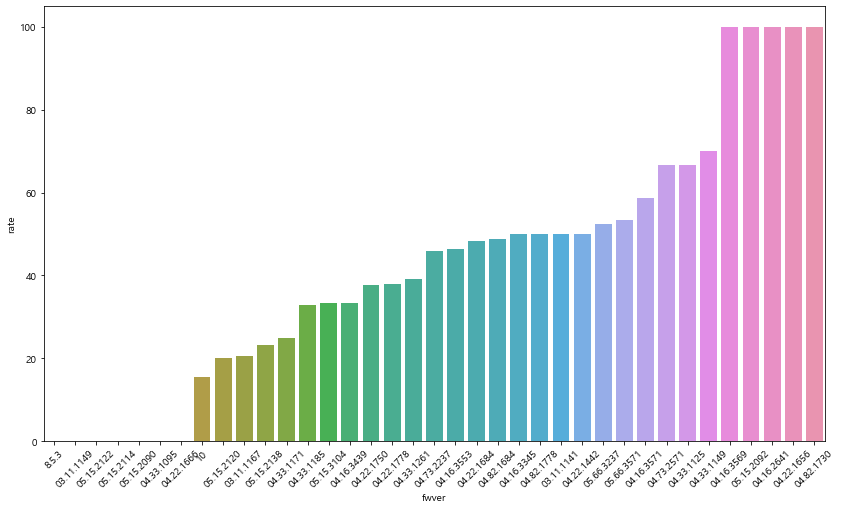

In [42]:
# fwver별 불만 제기율

plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.barplot(data=user_fwver, x='fwver', y='rate', order=user_fwver.sort_values('rate').fwver)

- fwver에 따라 불만율 차이가 많이 난다

### fwver업데이트

In [43]:
# fwver이 바뀌는 user가 많다. 
# fwver이 변경되었을 때 불만 제기율 확인
# fwver_df 사용
fwver_df

,user_id,fwver
0,10000,05.15.2138
316,10001,04.33.1185
684,10001,04.33.1261
2661,10002,05.15.2138
2966,10003,04.33.1185
...,...,...
15366473,24997,04.22.1750
15366933,24997,04.22.1778
15367291,24998,04.22.1750
15367299,24998,04.22.1778


In [44]:
user_fwver_num = fwver_df['user_id'].value_counts()
user_has_2fwvers = list(user_fwver_num.loc[user_fwver_num>1].to_frame().index)

In [45]:
user_sum = len(user_has_2fwvers)
user_prob_sum = len(list(train_problem[train_problem['user_id'].isin(user_has_2fwvers)].user_id.unique()))

print(f"fwver가 변경되고 불만을 제기한 사람 {user_prob_sum/user_sum*100}% ")

fwver가 변경되고 불만을 제기한 사람 39.696969696969695% 


- fwver이 변경되었을 때 변수가 유의미하게 작용한다.

## errtype 분석

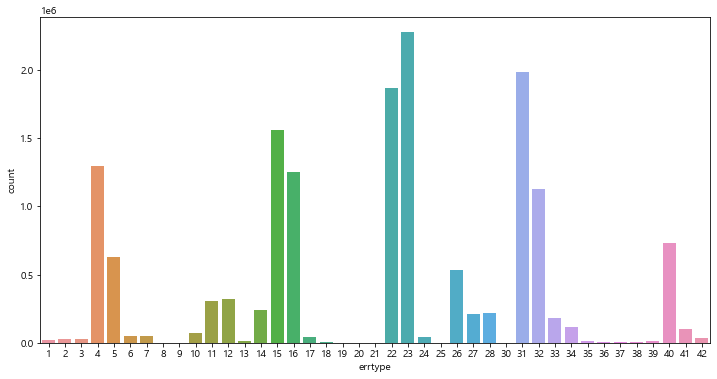

In [46]:
# errtype별 에러율 차이가 난다.
plt.figure(figsize=(12,6))
sns.countplot(data=train_err, x='errtype')
plt.show()

### errtype에 따른 불만제기

In [47]:
errtype_df = train_err[['user_id', 'errtype']]
errtype_df

,user_id,errtype
0,10000,15
1,10000,12
2,10000,11
3,10000,16
4,10000,4
...,...,...
15367996,24999,15
15367997,24999,16
15367998,24999,4
15367999,24999,4


In [48]:
errtype_df = errtype_df.drop_duplicates(subset=None, keep='first')
errtype_df

,user_id,errtype
0,10000,15
1,10000,12
2,10000,11
3,10000,16
4,10000,4
...,...,...
15367477,24999,13
15367479,24999,3
15367480,24999,7
15367481,24999,6


In [49]:
user_errtype = errtype_df.groupby('errtype')['user_id'].unique().to_frame().reset_index()
user_errtype['count'] = 0
user_errtype['rate'] = 0

In [50]:
for i in range(41):
    user_errtype['count'][i] = len(list(train_problem[train_problem['user_id'].isin(user_errtype.user_id[i])].user_id.unique()))

In [51]:
for i in range(41):
        user_errtype['rate'][i] = round(user_errtype['count'][i]/len(user_errtype.user_id[i]) * 100, 2)

In [52]:
user_errtype

,errtype,user_id,count,rate
0,1,"[10080, 10092, 10167, 10168, 10171, 10206, 102...",242,25.47
1,2,"[10025, 10134, 10226, 10233, 10292, 10306, 103...",168,43.08
2,3,"[10000, 10002, 10019, 10035, 10049, 10088, 101...",465,27.70
3,4,"[10000, 10002, 10004, 10005, 10006, 10010, 100...",2298,33.40
4,5,"[10001, 10002, 10003, 10005, 10006, 10009, 100...",4028,36.58
5,6,"[10000, 10001, 10002, 10003, 10004, 10006, 100...",2662,41.16
6,7,"[10000, 10001, 10002, 10003, 10004, 10005, 100...",3093,40.44
7,8,"[10548, 10640, 10974, 11096, 11129, 11330, 116...",13,20.31
8,9,"[10172, 10233, 10983, 11050, 11221, 12354, 126...",38,60.32
9,10,"[10000, 10002, 10005, 10013, 10014, 10020, 100...",1134,48.05


<AxesSubplot:xlabel='errtype', ylabel='rate'>

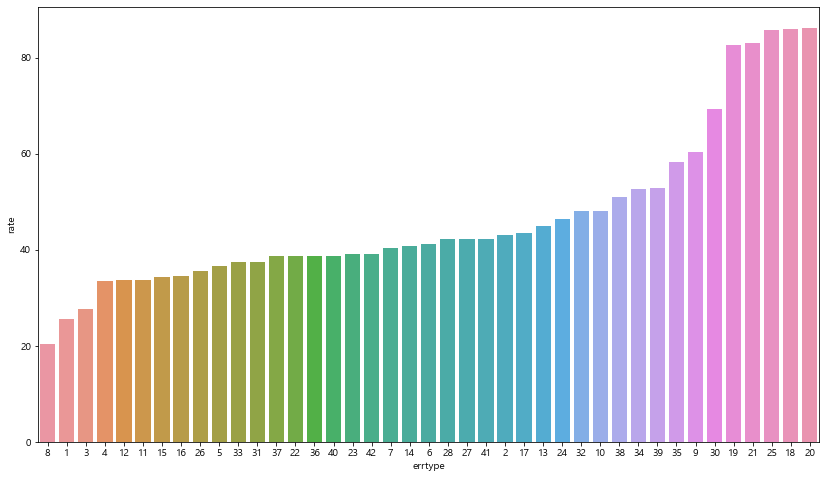

In [53]:
# errtype별 불만 제기율

plt.figure(figsize=(14,8))
sns.barplot(data=user_errtype, x='errtype', y='rate', order=user_errtype.sort_values('rate').errtype)

### errtype의 개수에 따른 불만율

In [54]:
errtype_df = train_err[['user_id', 'errtype']]
errtype_df

,user_id,errtype
0,10000,15
1,10000,12
2,10000,11
3,10000,16
4,10000,4
...,...,...
15367996,24999,15
15367997,24999,16
15367998,24999,4
15367999,24999,4


In [55]:
user_errtype_df = errtype_df.user_id.value_counts(sort=False).to_frame(name='count')
user_errtype_df

,count
10000,316
10001,2345
10002,305
10003,297
10004,777
...,...
24995,191
24996,4
24997,818
24998,144


In [56]:
problem_user = sorted(list(train_problem.user_id.unique()))

In [57]:
user_prob_sum = 0
user_not_prob_sum = 0

for i in list(user_errtype_df.index):
    if i in problem_user:
        user_prob_sum += user_errtype_df.loc[i, 'count']
    else:
        user_not_prob_sum += user_errtype_df.loc[i, 'count']

In [58]:
user_prob_sum, user_not_prob_sum

(6912950, 8455051)

In [59]:
print(f"불만을 제기한 사람들의 평균 errtype수는 {user_prob_sum/len(problem_user)}")
print(f"불만을 제기하지 않은 사람들의 평균 errtype수는 {user_not_prob_sum/(15000-len(problem_user))}")

불만을 제기한 사람들의 평균 errtype수는 1382.59
불만을 제기하지 않은 사람들의 평균 errtype수는 845.5051


- errtype의 수가 많을 수록 불만을 제기할 확률이 높다.

## errcode 분석

### errcode에 따른 불만율

In [68]:
len(train_err.errcode.unique())

2805

In [72]:
errcode_df = train_err.groupby('errcode')['user_id'].unique().to_frame().reset_index()
errcode_df

,errcode,user_id
0,-269,"[10050, 10404, 13065, 14345, 14906, 15764, 162..."
1,-270,"[16754, 17291, 18412, 19457, 20935, 21567, 216..."
2,0,"[10000, 10001, 10002, 10003, 10004, 10005, 100..."
3,0001,"[19201, 24489]"
4,1,"[10000, 10001, 10002, 10003, 10004, 10005, 100..."
...,...,...
2800,connectionterminated by local host,"[10009, 10021, 10023, 10038, 10039, 10042, 100..."
2801,http,[22428]
2802,scanning timeout,"[10107, 10208, 10249, 10300, 10349, 10450, 106..."
2803,standby,"[10001, 10004, 10005, 10007, 10008, 10011, 100..."


In [73]:
errcode_df['count'] = 0
errcode_df['rate'] = 0

In [74]:
for i in range(2805):
    errcode_df['count'][i] = len(list(train_problem[train_problem['user_id'].isin(errcode_df['user_id'][i])].user_id.unique()))

In [76]:
for i in range(2805):
    errcode_df['rate'][i] = round(errcode_df['count'][i]/len(errcode_df['user_id'][i]) * 100, 2)

In [79]:
errcode_df[(errcode_df['rate']>70) & (errcode_df['rate']<100) ]

,errcode,user_id,count,rate
51,106,"[10123, 10827, 14839, 15429, 15602, 15698, 179...",8,72.73
383,3013,"[10439, 10917, 13701, 17466, 18195]",4,80.00
389,3019,"[10827, 12706, 21096, 21145]",3,75.00
414,3043,"[10728, 14418, 18889, 19777, 21843, 22837]",5,83.33
419,3048,"[19874, 19931, 21096, 23946]",3,75.00
427,3055,"[21897, 22091, 22529, 24407]",3,75.00
428,3056,"[10301, 14109, 15804, 19160, 19755, 20146, 211...",7,77.78
432,3060,"[11968, 12813, 20999, 21897]",3,75.00
445,3073,"[14203, 15917, 17190, 21096, 24204, 24779]",5,83.33
460,3088,"[11664, 18867, 24413, 24854]",3,75.00


In [160]:
train_problem.sort_values('user_id')

,user_id,time
1116,10001,2020-11-13 19:00:00
492,10004,2020-11-04 12:00:00
3857,10005,2020-11-13 12:00:00
3826,10006,2020-11-10 18:00:00
414,10006,2020-11-10 17:00:00
...,...,...
3870,24983,2020-11-23 23:00:00
2378,24984,2020-11-30 15:00:00
3829,24990,2020-11-21 17:00:00
2799,24997,2020-11-15 15:00:00


In [158]:
train_err

,user_id,time,model_nm,fwver,errtype,errcode
0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0
...,...,...,...,...,...,...
15367996,24999,2020-11-30 16:30:51,model_3,05.15.2138,15,1
15367997,24999,2020-11-30 17:26:25,model_3,05.15.2138,16,1
15367998,24999,2020-11-30 17:26:25,model_3,05.15.2138,4,0
15367999,24999,2020-11-30 17:26:31,model_3,05.15.2138,4,0


## Quality 분석

In [129]:
train_quality.describe()

,user_id,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
count,272452.000000,272452.000000,272452.000000,272452.000000,272452.0,272452.0,272452.000000,272452.000000,272452.000000,272452.000000,272452.000000,2.724520e+05,272452.000000,272452.000000
mean,17559.687732,10.786660,-0.068684,14.158138,0.0,0.0,224.519387,3.069664,26.486376,0.177411,106.522925,1.828710e+03,-0.092328,0.038238
std,4389.671541,759.517259,0.796227,997.273716,0.0,0.0,3969.392409,34.457646,295.315129,6.319490,4576.446638,2.441835e+04,0.333191,0.296846
min,10000.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000
25%,13676.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000
50%,17488.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,1.900000e+01,0.000000,0.000000
75%,21546.000000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,0.000000,0.000000,0.000000,0.000000,2.020000e+02,0.000000,0.000000
max,24997.000000,157667.000000,171.000000,191859.000000,0.0,0.0,637385.000000,600.000000,7200.000000,1317.000000,397424.000000,1.910175e+06,14.000000,14.000000


In [130]:
# 모두 0인 quality_3, 4는 drop
train_quality.drop(columns=['quality_3', 'quality_4'], inplace=True)

In [131]:
# 절반정도 user는 train_quality에 존재하지 않는다.
len(train_quality.user_id.unique())

8224

### 불만을 제기한 user와 quality데이터의 관계

In [132]:
# 대부분 불만을 제기한 user의 quality데이터가 수집된건지 확인
quality_user = list(train_quality.user_id.unique())
problem_user = list(train_problem.user_id.unique())

In [133]:
len(quality_user), len(problem_user)

(8224, 5000)

In [134]:
cnt = 0
for i in problem_user:
    if i in quality_user:
        cnt += 1
print(f"불만을 제기한 사람 중 quality 데이터에도 있는 경우 : {round(cnt/len(quality_user)*100, 2)}%")

# 생각보다 연관성이 높진 않다.

불만을 제기한 사람 중 quality 데이터에도 있는 경우 : 38.4%


### -1값을 갖는 quality
quality 데이터를 보면 범위가 [0 ~ ∞] 또는 [-∞ ~ ∞] 가 아니라 [-1 ~ ∞]이다. 

-1은 퀄리티의 오류값일 수 있으므로 확인

In [135]:
has_minus_user = train_quality[train_quality.quality_0 == -1].groupby('user_id')['quality_0'].count().to_frame().reset_index()
has_minus_user

,user_id,quality_0
0,10002,1
1,10004,1
2,10005,1
3,10010,1
4,10013,7
...,...,...
5562,24986,5
5563,24992,2
5564,24993,2
5565,24995,2


In [136]:
has_minus_user = has_minus_user.sort_values(ascending=False, by='quality_0')
has_minus_user.head(100)

,user_id,quality_0
1750,14701,171
2028,15475,157
4310,21641,153
452,11252,144
2260,16101,142
...,...,...
3082,18393,42
2808,17641,42
1142,13117,40
499,11399,40


In [137]:
has_minus_user[:100]['user_id']

1750    14701
2028    15475
4310    21641
452     11252
2260    16101
        ...  
3082    18393
2808    17641
1142    13117
499     11399
3315    18967
Name: user_id, Length: 100, dtype: int64

In [161]:
# 상위 100명
problem_user = len(train_problem[train_problem['user_id'].isin(has_minus_user[:100]['user_id'])].user_id.unique())
print(f"상위 100명중 불만을 제기한 사람: {problem_user/100 * 100}%")

# 상위 500명
problem_user = len(train_problem[train_problem['user_id'].isin(has_minus_user[:500]['user_id'])].user_id.unique())
print(f"상위 500명중 불만을 제기한 사람: {problem_user/500 * 100}%")

# 전체 유저 수
problem_user = len(train_problem[train_problem['user_id'].isin(has_minus_user['user_id'])].user_id.unique())
print(f"전체 유저 중 불만을 제기한 사람: {problem_user/5567 * 100}%")

상위 100명중 불만을 제기한 사람: 71.0%
상위 500명중 불만을 제기한 사람: 61.4%
전체 유저 중 불만을 제기한 사람: 41.67415124842824%


- '-1'이라는 퀄리티 값을 많이 가질수록 불만제기율이 높다.
- 다른 값들에 대해서도 확인하면서 더블 체킹을 해준다

In [185]:
# 1값을 갖는 유저들
has_1_user = train_quality[train_quality.quality_1 == 1].groupby('user_id')['quality_1'].count().to_frame().reset_index()
has_1_user = has_1_user.sort_values(ascending=False, by='quality_1')


# 상위 100명
problem_user = len(train_problem[train_problem['user_id'].isin(has_1_user[:100]['user_id'])].user_id.unique())
print(f"상위 100명중 불만을 제기한 사람: {problem_user/100 * 100}%")

# 상위 500명
problem_user = len(train_problem[train_problem['user_id'].isin(has_1_user[:500]['user_id'])].user_id.unique())
print(f"상위 500명중 불만을 제기한 사람: {problem_user/500 * 100}%")

# 전체 유저 수
problem_user = len(train_problem[train_problem['user_id'].isin(has_1_user['user_id'])].user_id.unique())
print(f"전체 유저 중 불만을 제기한 사람: {problem_user/len(has_1_user.index) * 100}%")

상위 100명중 불만을 제기한 사람: 61.0%
상위 500명중 불만을 제기한 사람: 56.2%
전체 유저 중 불만을 제기한 사람: 53.36225596529284%


In [188]:
# 0값을 갖는 유저들
has_0_user = train_quality[train_quality.quality_0 == 0].groupby('user_id')['quality_0'].count().to_frame().reset_index()
has_0_user = has_0_user.sort_values(ascending=False, by='quality_0')


# 상위 100명
problem_user = len(train_problem[train_problem['user_id'].isin(has_0_user[:100]['user_id'])].user_id.unique())
print(f"상위 100명중 불만을 제기한 사람: {problem_user/100 * 100}%")

# 상위 500명
problem_user = len(train_problem[train_problem['user_id'].isin(has_0_user[:500]['user_id'])].user_id.unique())
print(f"상위 500명중 불만을 제기한 사람: {problem_user/500 * 100}%")


# 전체 유저 수
problem_user = len(train_problem[train_problem['user_id'].isin(has_0_user['user_id'])].user_id.unique())
print(f"전체 유저 중 불만을 제기한 사람: {problem_user/len(has_0_user.index) * 100}%")

상위 100명중 불만을 제기한 사람: 67.0%
상위 500명중 불만을 제기한 사람: 56.99999999999999%
전체 유저 중 불만을 제기한 사람: 38.39698370226222%


- -1 뿐만 아니라 다른 값에 대해서도 비슷한 양상이 보이므로 -1에대한 feature를 따로 만들기에는 적합하지 않다.

In [141]:
train_quality.describe()

,user_id,quality_0,quality_1,quality_2,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
count,272452.000000,272452.000000,272452.000000,272452.000000,272452.000000,272452.000000,272452.000000,272452.000000,272452.000000,2.724520e+05,272452.000000,272452.000000
mean,17559.687732,10.786660,-0.068684,14.158138,224.519387,3.069664,26.486376,0.177411,106.522925,1.828710e+03,-0.092328,0.038238
std,4389.671541,759.517259,0.796227,997.273716,3969.392409,34.457646,295.315129,6.319490,4576.446638,2.441835e+04,0.333191,0.296846
min,10000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,0.000000
25%,13676.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,0.000000,0.000000
50%,17488.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.900000e+01,0.000000,0.000000
75%,21546.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,2.020000e+02,0.000000,0.000000
max,24997.000000,157667.000000,171.000000,191859.000000,637385.000000,600.000000,7200.000000,1317.000000,397424.000000,1.910175e+06,14.000000,14.000000
